In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn import preprocessing as sk_preprocessing
from sklearn.preprocessing import MinMaxScaler

In [236]:
df11=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Benign\stateless_benign\stateless_features-benign_1.pcap.xlsx',header=None)
df11_sf=pd.read_csv(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Benign\stateful_benign\stateful_features-benign_1.pcap.csv',header=None)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,23,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [239]:
df12=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Benign\stateless_benign\stateless_features-benign_2.pcap.xlsx',header=None)
df12_sf=pd.read_csv(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Benign\stateful_benign\stateful_features-benign_2.pcap.csv',header=None)

In [243]:
df11.shape

(132500, 17)

In [5]:
def pre_process(df):
    column=df.iloc[0]
    df.columns=column
    df=df[1:]
    return df

In [6]:
df1=pre_process(df11)
df2=pre_process(df12)

In [234]:
df12

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,day,type
0,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,day,type
1,2020-11-20 23:25:08.168000,28,11,0,10,12,2.20579,6,6,7,3.83333,9,239,15,1,1,Benign
2,2020-11-20 23:25:08.579000,28,11,0,10,12,2.20579,6,6,7,3.83333,9,239,15,1,1,Benign
3,2020-11-20 23:25:09.814000,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,1,Benign
4,2020-11-20 23:25:10.224000,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88570,2020-11-21 04:57:35.304000,25,8,0,10,9,2.78622,6,6,7,3.33333,2,192,12,1,1,Benign
88571,2020-11-21 04:57:35.714000,25,8,0,10,9,2.78622,6,6,7,3.33333,2,192,12,1,1,Benign
88572,2020-11-21 04:57:36.949000,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,1,Benign
88573,2020-11-21 04:57:37.359000,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,1,Benign


In [8]:
day1= pd.concat((df11,df12),ignore_index=True)

In [9]:
day1

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,day,type
0,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,day,type
1,2020-11-20 13:58:38.988000,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,1,Benign
2,2020-11-20 13:58:39,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,1,Benign
3,2020-11-20 13:58:39.991000,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,1,Benign
4,2020-11-20 13:58:40.401000,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221070,2020-11-21 04:57:35.304000,25,8,0,10,9,2.78622,6,6,7,3.33333,2,192,12,1,1,Benign
221071,2020-11-21 04:57:35.714000,25,8,0,10,9,2.78622,6,6,7,3.33333,2,192,12,1,1,Benign
221072,2020-11-21 04:57:36.949000,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,1,Benign
221073,2020-11-21 04:57:37.359000,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,1,Benign


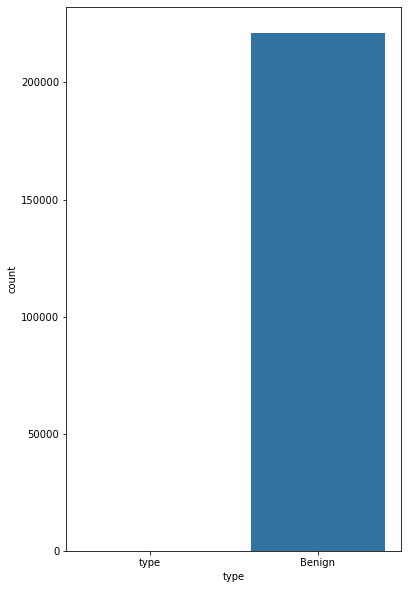

In [10]:
plt.figure(figsize=(6,10))
day1_plot=sns.countplot(x='type', data=day1,color='tab:blue')

In [11]:
df21=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Light Attacks\stateless_light\stateless_features-light_audio.pcap.xlsx',header=None)

In [12]:
df22=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Light Attacks\stateless_light\stateless_features-light_compressed.pcap.xlsx',header=None)
df23=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Light Attacks\stateless_light\stateless_features-light_exe.pcap.xlsx',header=None)
df24=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Light Attacks\stateless_light\stateless_features-light_image.pcap.xlsx',header=None)
df25=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Light Attacks\stateless_light\stateless_features-light_text.pcap.xlsx',header=None)
df26=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Light Attacks\stateless_light\stateless_features-light_video.pcap.xlsx',header=None)

In [13]:
df27=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Light Attacks\light_benign\stateless_features-light_benign.pcap.xlsx',header=None)

In [14]:
df21=pre_process(df21)
df22=pre_process(df22)
df23=pre_process(df23)
df24=pre_process(df24)
df25=pre_process(df25)
df26=pre_process(df26)
df27=pre_process(df27)

In [15]:
df22.describe()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,day,type
count,10241,10241,10241,10241,10241,10241,10241.000000,10241,10241,10241,10241.000000,10241,10241,10241,10241,10241,10241
unique,10172,19,14,4,13,9,35.000000,6,5,12,16.000000,17,20,18,2,1,1
top,2020-11-21 22:49:25.769000,24,7,0,10,8,2.054029,6,6,7,3.166667,2,192,11,1,2,Compressed
freq,6,3646,3646,9736,9619,3646,3646.000000,9618,9618,9618,3646.000000,5870,5846,3646,9720,10241,10241


In [16]:
day2= pd.concat((df21,df22,df23,df24,df25,df26,df27),ignore_index=True)

In [17]:
day2

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,day,type
0,2020-11-21 19:13:27.035000,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1,2,Audio
1,2020-11-21 19:13:27.445000,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1,2,Audio
2,2020-11-21 19:13:27.857000,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,2,Audio
3,2020-11-21 19:13:28.267000,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,2,Audio
4,2020-11-21 19:13:29.503000,25,8,0,10,9,2.55664,6,6,7,3.33333,2,192,12,1,2,Audio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102769,2020-11-21 18:09:47.739000,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1,2,Benign
102770,2020-11-21 18:09:48.975000,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,2,Benign
102771,2020-11-21 18:09:49.385000,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,2,Benign
102772,2020-11-21 18:09:49.797000,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,2,Benign


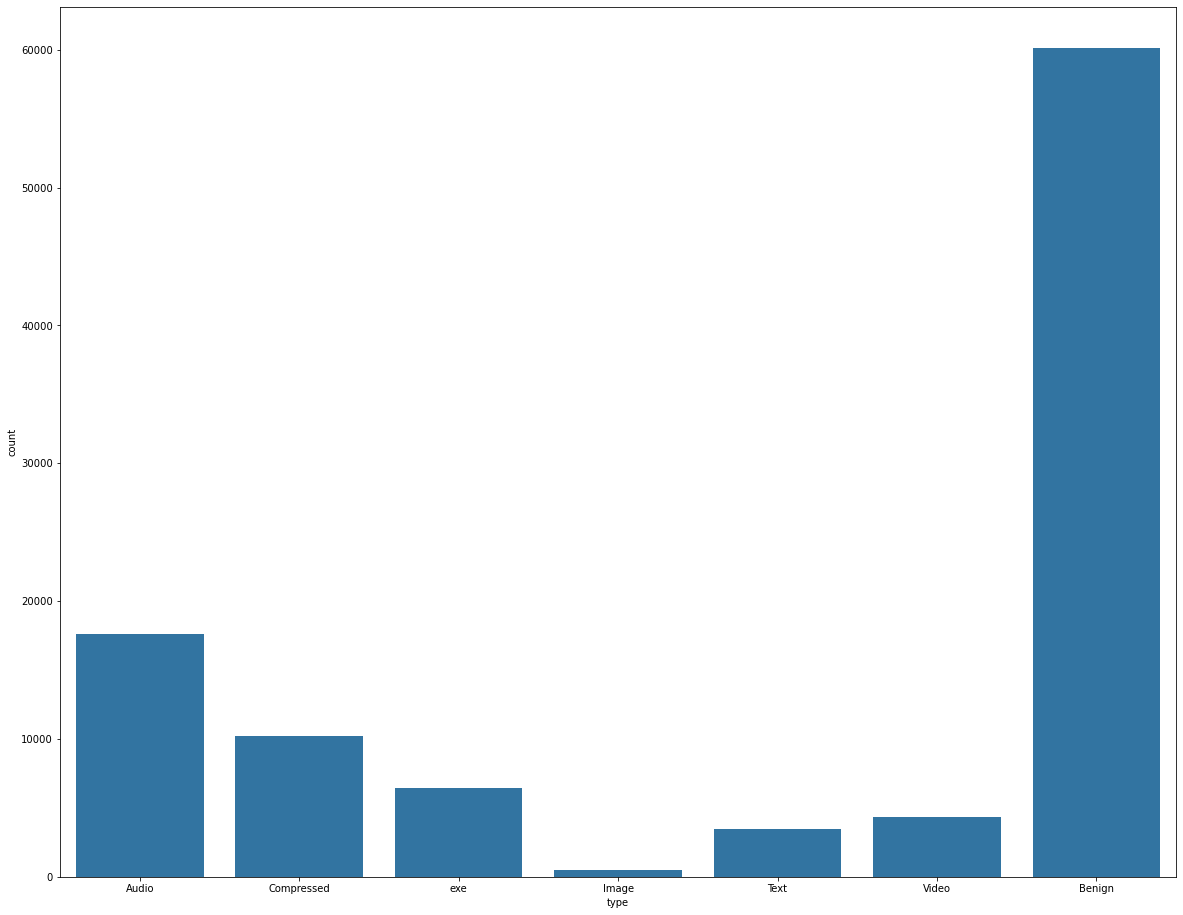

In [18]:
plt.figure(figsize=(20,16)) # this creates a figure 8 inch wide, 4 inch high
day2_plot=sns.countplot(x='type', data=day2,color='tab:blue')

In [19]:
df31=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\stateless_heavy\stateless_features-heavy_audio.pcap.xlsx',header=None)

In [20]:
df32=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\stateless_heavy\stateless_features-heavy_compressed.pcap.xlsx',header=None)

In [21]:
df33=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\heavy_benign\stateless_benign_heavy\stateless_features-benign_heavy_1.pcap.xlsx',header=None)

In [22]:
df31=pre_process(df31)
df32=pre_process(df32)
df33=pre_process(df33)

In [23]:
day3= pd.concat((df31,df32,df33),ignore_index=True)

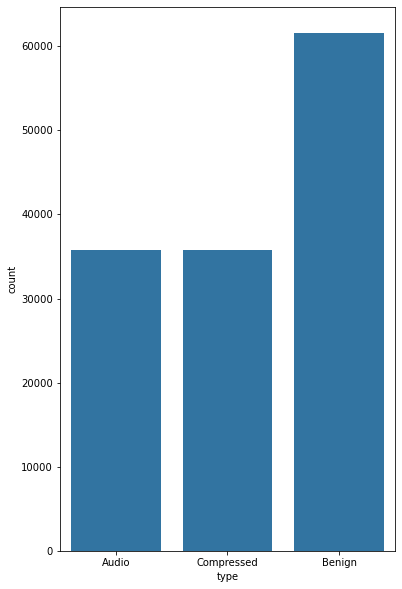

In [24]:
plt.figure(figsize=(6,10)) # this creates a figure 8 inch wide, 4 inch high
day3_plot=sns.countplot(x='type', data=day3,color='tab:blue')

In [25]:
df41=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\stateless_heavy\stateless_features-heavy_image.pcap.xlsx',header=None)
df42=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\stateless_heavy\stateless_features-heavy_text.pcap.xlsx',header=None)
df43=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\heavy_benign\stateless_benign_heavy\stateless_features-benign_heavy_2.pcap.xlsx',header=None)

In [26]:
df41=pre_process(df41)
df42=pre_process(df42)
df43=pre_process(df43)

In [27]:
day4= pd.concat((df41,df42,df43),ignore_index=True)

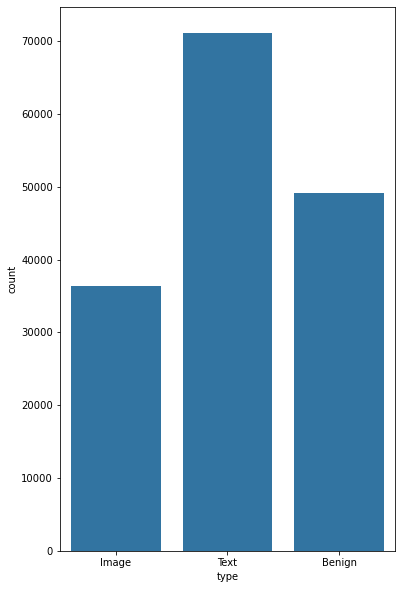

In [28]:
plt.figure(figsize=(6,10)) # this creates a figure 8 inch wide, 4 inch high
day4_plot=sns.countplot(x='type', data=day4,color='tab:blue')

In [29]:
df51=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\stateless_heavy\stateless_features-heavy_video.pcap.xlsx',header=None)
df52=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\stateless_heavy\stateless_features-heavy_exe.pcap.xlsx',header=None)
df53=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\heavy_benign\stateless_benign_heavy\stateless_features-benign_heavy_3.pcap.xlsx',header=None)

In [30]:
df51=pre_process(df51)
df52=pre_process(df52)
df53=pre_process(df53)

In [31]:
day5= pd.concat((df51,df52,df53),ignore_index=True)

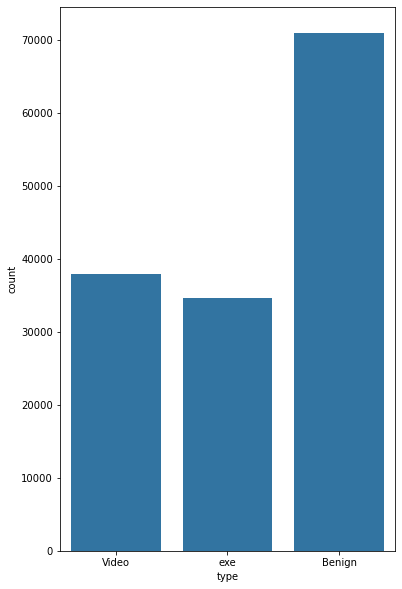

In [32]:
plt.figure(figsize=(6,10)) # this creates a figure 8 inch wide, 4 inch high
day5_plot=sns.countplot(x='type', data=day5,color='tab:blue')

In [33]:
day1

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,day,type
0,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,day,type
1,2020-11-20 13:58:38.988000,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,1,Benign
2,2020-11-20 13:58:39,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,1,Benign
3,2020-11-20 13:58:39.991000,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,1,Benign
4,2020-11-20 13:58:40.401000,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221070,2020-11-21 04:57:35.304000,25,8,0,10,9,2.78622,6,6,7,3.33333,2,192,12,1,1,Benign
221071,2020-11-21 04:57:35.714000,25,8,0,10,9,2.78622,6,6,7,3.33333,2,192,12,1,1,Benign
221072,2020-11-21 04:57:36.949000,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,1,Benign
221073,2020-11-21 04:57:37.359000,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,1,Benign


In [34]:
all_days= pd.concat((day1,day2,day3,day4,day5),ignore_index=True)

In [35]:
all_days

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,day,type
0,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,day,type
1,2020-11-20 13:58:38.988000,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,1,Benign
2,2020-11-20 13:58:39,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,1,Benign
3,2020-11-20 13:58:39.991000,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,1,Benign
4,2020-11-20 13:58:40.401000,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757208,2020-11-24 16:53:18.020000,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,5,Benign
757209,2020-11-24 16:53:18.433000,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,5,Benign
757210,2020-11-24 16:53:18.844000,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,5,Benign
757211,2020-11-24 16:53:20.079000,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,5,Benign


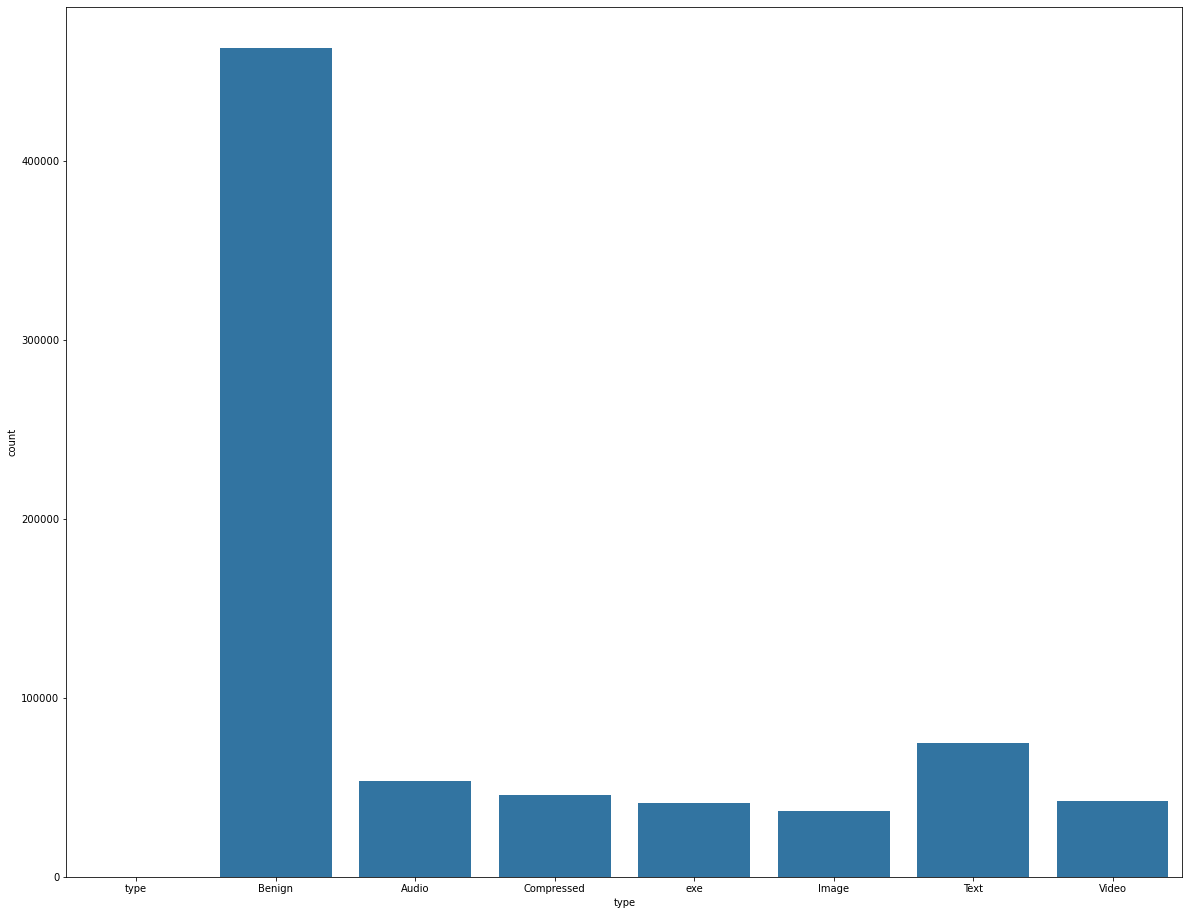

In [36]:
plt.figure(figsize=(20,16)) # this creates a figure 8 inch wide, 4 inch high
all_days_plot=sns.countplot(x='type', data=all_days,color='tab:blue')

In [37]:
def split(data):
    Y = data['type']
    X = data.drop(['timestamp', 'type','day'], axis = 1)
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
    return X_train,Y_train,X_test,Y_test

## Train test split for each attack for each day

In [38]:
X_train_d1_b,Y_train_d1_b,X_test_d1_b,Y_test_d1_b=split(day1)

In [39]:
X_train_d2_audio,Y_train_d2_audio,X_test_d2_audio,Y_test_d2_audio=split(df21)
X_train_d2_comp,Y_train_d2_comp,X_test_d2_comp,Y_test_d2_comp=split(df22)
X_train_d2_exe,Y_train_d2_exe,X_test_d2_exe,Y_test_d2_exe=split(df23)
X_train_d2_img,Y_train_d2_img,X_test_d2_img,Y_test_d2_img=split(df24)
X_train_d2_txt,Y_train_d2_txt,X_test_d2_txt,Y_test_d2_txt=split(df25)
X_train_d2_vid,Y_train_d2_vid,X_test_d2_vid,Y_test_d2_vid=split(df26)
X_train_d2_b,Y_train_d2_b,X_test_d2_b,Y_test_d2_b=split(df27)

In [40]:
X_train_d2_vid

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
4046,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
2343,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1
2511,25,8,0,10,9,2.78622,6,6,7,3.33333,2,192,12,1
1813,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
3614,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1
467,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1
3093,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
3773,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1


In [41]:
X_train_d3_b,Y_train_d3_b,X_test_d3_b,Y_test_d3_b=split(df33)
X_train_d3_audio,Y_train_d3_audio,X_test_d3_audio,Y_test_d3_audio=split(df31)
X_train_d3_comp,Y_train_d3_comp,X_test_d3_comp,Y_test_d3_comp=split(df32)

In [42]:
X_train_d3_audio

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
24802,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1
6635,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1
13482,25,8,0,10,9,2.78622,6,6,7,3.33333,2,192,12,1
4786,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
15632,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16851,27,10,0,10,11,2.5354,6,6,7,3.66667,2,192,14,1
6266,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
11285,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1
861,32,0,32,0,0,2.67453,0,1,32,32,L,FHEPFCELEHFCEPFFFACACACACACACABL,33,0


In [43]:
X_train_d4_img,Y_train_d4_img,X_test_d4_img,Y_test_d4_img=split(df41)
X_train_d4_txt,Y_train_d4_txt,X_test_d4_txt,Y_test_d4_txt=split(df42)
X_train_d4_b,Y_train_d4_b,X_test_d4_b,Y_test_d4_b=split(df43)

In [44]:
X_train_d5_vid,Y_train_d5_vid,X_test_d5_vid,Y_test_d5_vid=split(df51)
X_train_d5_exe,Y_train_d5_exe,X_test_d5_exe,Y_test_d5_exe=split(df52)
X_train_d5_b,Y_train_d5_b,X_test_d5_b,Y_test_d5_b=split(df53)

# Decision Tree Classifier

In [45]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf_heavy = tree.DecisionTreeClassifier(criterion='gini')

In [46]:
X_train_d2= pd.concat((X_train_d2_audio,X_train_d2_comp,X_train_d2_exe,X_train_d2_img,X_train_d2_txt,X_train_d2_vid,X_train_d2_b),ignore_index=True)

In [47]:
Y_train_d2= pd.concat((Y_train_d2_audio,Y_train_d2_comp,Y_train_d2_exe,Y_train_d2_img,Y_train_d2_txt,Y_train_d2_vid,Y_train_d2_b),ignore_index=True)

In [48]:
X_test_d2= pd.concat((X_test_d2_audio,X_test_d2_comp,X_test_d2_exe,X_test_d2_img,X_test_d2_txt,X_test_d2_vid,X_test_d2_b),ignore_index=True)

In [49]:
Y_test_d2= pd.concat((Y_test_d2_audio,Y_test_d2_comp,Y_test_d2_exe,Y_test_d2_img,Y_test_d2_txt,Y_test_d2_vid,Y_test_d2_b),ignore_index=True)

In [50]:
X_train_heavy= pd.concat((X_train_d3_audio,X_train_d3_comp,X_train_d5_exe,X_train_d4_img,X_train_d4_txt,X_train_d5_vid,X_train_d3_b,X_train_d4_b,X_train_d5_b),ignore_index=True)
Y_train_heavy= pd.concat((Y_train_d3_audio,Y_train_d3_comp,Y_train_d5_exe,Y_train_d4_img,Y_train_d4_txt,Y_train_d5_vid,Y_train_d3_b,Y_train_d4_b,Y_train_d5_b),ignore_index=True)
X_test_heavy= pd.concat((X_test_d3_audio,X_test_d3_comp,X_test_d5_exe,X_test_d4_img,X_test_d4_txt,X_test_d5_vid,X_test_d3_b,X_test_d4_b,X_test_d5_b),ignore_index=True)
Y_test_heavy= pd.concat((Y_test_d3_audio,Y_test_d3_comp,Y_test_d5_exe,Y_test_d4_img,Y_test_d4_txt,Y_test_d5_vid,Y_test_d3_b,Y_test_d4_b,Y_test_d5_b),ignore_index=True)

In [51]:
X_train_d2

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1
1,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
2,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
3,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1
4,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71933,16,0,0,15,0,2.80041,1,2,12,7.5,forums,ubuntuforums,13,0
71934,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1
71935,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
71936,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1


In [52]:
X_train_heavy

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1
1,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1
2,25,8,0,10,9,2.78622,6,6,7,3.33333,2,192,12,1
3,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
4,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303346,25,8,0,10,9,2.55664,6,6,7,3.33333,2,192,12,1
303347,9,0,0,8,0,1.8208,1,2,5,4,ibt,ibtta,6,0
303348,10,0,0,9,0,1.72703,1,2,6,4.5,med,eyemed,7,0
303349,15,3,0,13,0,2.34904,2,3,7,4.33333,honor,hihonor,11,1


In [53]:
X_test_d2

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1
1,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
2,25,8,0,10,9,2.55664,6,6,7,3.33333,2,192,12,1
3,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1
4,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30831,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1
30832,7,0,0,6,0,1.85754,1,2,4,3,idol,idol,5,0
30833,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1
30834,19,0,0,18,0,3.21438,1,2,16,9,himmel,himmelstaenzerin,17,0


In [54]:
X_test_heavy

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1
1,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
2,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1
3,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1
4,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130008,16,0,0,14,0,3.10683,2,2,13,7.5,loi,emploi-public,14,0
130009,25,8,0,10,9,2.55664,6,6,7,3.33333,2,192,12,1
130010,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
130011,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1


In [55]:
X_train_d2.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
count,71938,71938,71938,71938,71938,71938.000000,71938,71938,71938,71938.000000,71936,71938,71938,71938
unique,34,24,4,34,13,585.000000,8,6,31,69.000000,5930,10349,32,2
top,24,0,0,10,0,2.054029,6,6,7,3.166667,2,192,11,1
freq,16852,21839,69727,46031,26327,16615.000000,43545,43540,46288,16610.000000,26491,26377,19024,50099


In [56]:
X_test_d2.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
count,30836,30836,30836,30836,30836,30836.000000,30836,30836,30836,30836.000000,30834,30836,30836,30836
unique,33,23,5,32,13,470.000000,8,6,30,62.000000,4485,7072,30,2
top,24,0,0,10,0,2.054029,6,6,7,3.166667,2,192,11,1
freq,7305,9254,29844,19774,11242,7190.000000,18688,18687,19947,7188.000000,11308,11254,8264,21582


In [57]:
X_train_d2['longest_word'].unique().size

5931

In [58]:
X_train_d2['sld'].unique().size

10349

In [59]:
Y_train_d2=Y_train_d2.replace(to_replace={'Benign':0,'Audio':1,'Compressed':1,'exe':1,'Image':1,'Text':1,'Video':1})

In [60]:
Y_test_d2=Y_test_d2.replace(to_replace={'Benign':0,'Audio':1,'Compressed':1,'exe':1,'Image':1,'Text':1,'Video':1})

In [61]:
Y_train_heavy=Y_train_heavy.replace(to_replace={'Benign':0,'Audio':1,'Compressed':1,'exe':1,'Image':1,'Text':1,'Video':1})
Y_test_heavy=Y_test_heavy.replace(to_replace={'Benign':0,'Audio':1,'Compressed':1,'exe':1,'Image':1,'Text':1,'Video':1})

In [62]:
Y_test_d2

0        1
1        1
2        1
3        1
4        1
        ..
30831    0
30832    0
30833    0
30834    0
30835    0
Name: type, Length: 30836, dtype: int64

In [63]:
def conversion(l_word_count):
    str_list=[]
    ascii_val=[]
    words=np.array(l_word_count)
    for index, value in enumerate(words):
        words[index] = str(words[index])
    for word in words:
        ascii_sum=0
        str_list=list(word)
        for char in str_list:
            ascii_sum+=ord(char)
        ascii_val.append(ascii_sum % l_word_count.unique().size)
    return ascii_val

In [64]:
X_train_d2['longest_word']=conversion(X_train_d2['longest_word'])
X_train_d2['sld']=conversion(X_train_d2['sld'])

In [65]:
X_test_d2['longest_word']=conversion(X_test_d2['longest_word'])
X_test_d2['sld']=conversion(X_test_d2['sld'])

In [103]:
X_train_heavy['longest_word']=conversion(X_train_heavy['longest_word'])
X_train_heavy['sld']=conversion(X_train_heavy['sld'])

In [104]:
X_test_heavy['longest_word']=conversion(X_test_heavy['longest_word'])
X_test_heavy['sld']=conversion(X_test_heavy['sld'])

In [81]:
X_test_heavy

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1
1,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
2,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1
3,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1
4,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130008,16,0,0,14,0,3.10683,2,2,13,7.5,loi,emploi-public,14,0
130009,25,8,0,10,9,2.55664,6,6,7,3.33333,2,192,12,1
130010,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1
130011,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1


In [82]:
clf.fit(X_train_d2,Y_train_d2)

DecisionTreeClassifier(criterion='entropy')

In [85]:
X_test_d2

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,27,10,0,10,11,2.76719,6,6,7,3.66667,50,156,14,1
1,24,7,0,10,8,2.05403,6,6,7,3.16667,52,152,11,1
2,25,8,0,10,9,2.55664,6,6,7,3.33333,50,156,12,1
3,27,10,0,10,11,2.76719,6,6,7,3.66667,50,156,14,1
4,24,7,0,10,8,2.05403,6,6,7,3.16667,52,152,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30831,26,9,0,10,10,2.74234,6,6,7,3.5,50,156,13,1
30832,7,0,0,6,0,1.85754,1,2,4,3,424,424,5,0
30833,26,9,0,10,10,2.74234,6,6,7,3.5,50,156,13,1
30834,19,0,0,18,0,3.21438,1,2,16,9,636,1727,17,0


In [86]:
Y_pred_d2_dt=clf.predict(X_test_d2)
Y_pred_d2_dt

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [87]:
print(classification_report(Y_test_d2,Y_pred_d2_dt))
#precision=true positive/true positive + false positive
#recall=true positive/true positive + false negative
#in this case, the classifier identified benign attacks as light attacks 

              precision    recall  f1-score   support

           0       1.00      0.61      0.76     18028
           1       0.64      1.00      0.78     12808

    accuracy                           0.77     30836
   macro avg       0.82      0.80      0.77     30836
weighted avg       0.85      0.77      0.77     30836



In [88]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [89]:
cm_dt = confusion_matrix(Y_test_d2,Y_pred_d2_dt)

In [116]:
clf_heavy.fit(X_train_heavy,Y_train_heavy)

DecisionTreeClassifier()

In [117]:
Y_pred_heavy_dt=clf_heavy.predict(X_test_heavy)

In [123]:
print(classification_report(Y_test_heavy,Y_pred_heavy_dt))
cm_heavy_dt = confusion_matrix(Y_test_heavy,Y_pred_heavy_dt)

              precision    recall  f1-score   support

           0       1.00      0.60      0.75     54510
           1       0.78      1.00      0.87     75503

    accuracy                           0.83    130013
   macro avg       0.89      0.80      0.81    130013
weighted avg       0.87      0.83      0.82    130013



In [124]:
accuracy(cm_heavy_dt)*100

83.24475244783214

In [90]:
accuracy(cm_dt)*100

76.98793617849266

In [91]:
rf_clf=RandomForestClassifier(n_estimators=200,criterion='gini')

In [69]:
rf_clf.fit(X_train_d2,Y_train_d2)

RandomForestClassifier(n_estimators=200)

In [70]:
Y_pred_d2_rf=rf_clf.predict(X_test_d2)

In [71]:
print(classification_report(Y_test_d2,Y_pred_d2_rf))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76     18028
           1       0.64      1.00      0.78     12808

    accuracy                           0.77     30836
   macro avg       0.82      0.80      0.77     30836
weighted avg       0.85      0.77      0.77     30836



In [72]:
cm_rf = confusion_matrix(Y_test_d2,Y_pred_d2_rf)

In [73]:
accuracy(cm_rf)*100

77.01063691788819

In [75]:
scaler = sk_preprocessing.StandardScaler()
scaler.fit(X_train_d2)
X_train_d2_scaled = scaler.transform(X_train_d2)
X_test_d2_scaled = scaler.transform(X_test_d2)

In [76]:
X_train_d2_scaled

array([[ 0.87910642,  1.10705332, -0.1605114 , ..., -0.6506116 ,
         0.38359825,  0.66024002],
       [ 0.40749183,  0.37073959, -0.1605114 , ..., -0.6582161 ,
        -0.33323703,  0.66024002],
       [ 0.40749183,  0.37073959, -0.1605114 , ..., -0.6582161 ,
        -0.33323703,  0.66024002],
       ...,
       [ 0.40749183,  0.37073959, -0.1605114 , ..., -0.6582161 ,
        -0.33323703,  0.66024002],
       [ 0.87910642,  1.10705332, -0.1605114 , ..., -0.6506116 ,
         0.38359825,  0.66024002],
       [ 0.40749183,  0.37073959, -0.1605114 , ..., -0.6582161 ,
        -0.33323703,  0.66024002]])

In [76]:
svc = SVC()
svc.fit(X_train_d2_scaled, Y_train_d2.values.ravel())
Y_pred_d2_svm = svc.predict(X_test_d2_scaled)
cm_svm = confusion_matrix(Y_test_d2, Y_pred_d2_svm)

In [77]:
accuracy(cm_svm)*100

76.99117914126346

In [78]:
print(classification_report(Y_test_d2,Y_pred_d2_svm))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76     18028
           1       0.64      1.00      0.78     12808

    accuracy                           0.77     30836
   macro avg       0.82      0.80      0.77     30836
weighted avg       0.85      0.77      0.77     30836



# ANN

In [199]:
model = Sequential()
model.add(Dense(14, input_dim=14, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [200]:
scaler_ann=MinMaxScaler()

In [183]:
X_train_d2_ann=scaler_ann.fit_transform(X_train_d2)
X_train_d2_ann.shape

(71938, 14)

In [165]:
X_test_d2_ann=scaler_ann.transform(X_test_d2)
X_test_d2_ann.mean()

0.3634255714330055

In [166]:
Y_train_d2_ann=Y_train_d2.values
Y_test_d2_ann=Y_test_d2.values

In [1]:
earlystop=EarlyStopping(monitor='loss', mode='max', verbose=1, patience=10)

NameError: name 'EarlyStopping' is not defined

In [222]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [203]:
model.fit(X_train_d2_ann, Y_train_d2_ann, epochs=70, batch_size=100, validation_data=(X_test_d2_ann,Y_test_d2_ann), callbacks=[earlystop])

Epoch 1/70
720/720 [==============================] - 1s 1ms/step - loss: 0.6224 - accuracy: 0.7546 - val_loss: 0.5607 - val_accuracy: 0.7582
Epoch 2/70
720/720 [==============================] - 1s 1ms/step - loss: 0.5185 - accuracy: 0.7614 - val_loss: 0.4960 - val_accuracy: 0.7582
Epoch 3/70
720/720 [==============================] - 1s 963us/step - loss: 0.4799 - accuracy: 0.7614 - val_loss: 0.4719 - val_accuracy: 0.7582
Epoch 4/70
720/720 [==============================] - 1s 949us/step - loss: 0.4616 - accuracy: 0.7614 - val_loss: 0.4573 - val_accuracy: 0.7582
Epoch 5/70
720/720 [==============================] - 1s 990us/step - loss: 0.4522 - accuracy: 0.7650 - val_loss: 0.4512 - val_accuracy: 0.7651
Epoch 6/70
720/720 [==============================] - 1s 956us/step - loss: 0.4486 - accuracy: 0.7671 - val_loss: 0.4487 - val_accuracy: 0.7651
Epoch 7/70
720/720 [==============================] - 1s 995us/step - loss: 0.4468 - accuracy: 0.7671 - val_loss: 0.4473 - val_accuracy: 0.7

<AxesSubplot:>

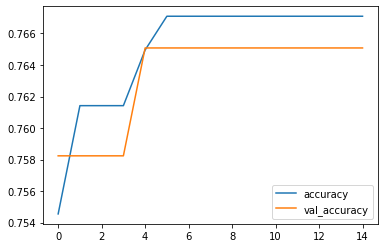

In [204]:
losses=pd.DataFrame(model.history.history)
accuracyy=losses[['accuracy', 'val_accuracy']]
accuracyy.plot()

<AxesSubplot:>

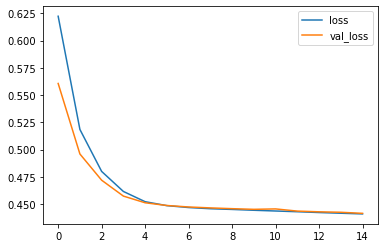

In [205]:
losses=losses.drop(['accuracy', 'val_accuracy'], axis=1)
losses.plot()

In [219]:
#Y_pred_d2_ann=model.predict_classes(X_test_d2_ann)
#predict_x=model.predict(X_test_d2_ann) 
Y_pred_d2_ann = (model.predict(X_test_d2_ann) > 0.5).astype("int32")


In [223]:
print(classification_report(Y_test_d2_ann,Y_pred_d2_ann))

              precision    recall  f1-score   support

           0       0.97      0.62      0.75     18028
           1       0.64      0.97      0.77     12808

    accuracy                           0.77     30836
   macro avg       0.81      0.80      0.76     30836
weighted avg       0.83      0.77      0.76     30836



In [226]:
cm_d2_ann=confusion_matrix(Y_test_d2_ann,Y_pred_d2_ann)

In [227]:
accuracy(cm_d2_ann)

0.7650797768841614